# Price


In [ ]:
import pandas as pd

# 从GitHub下载CSV文件并读取数据
url = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/MANA_price.csv'
data = pd.read_csv(url)

# 规范日期格式
data['Date'] = pd.to_datetime(data['Date'])

# 去掉美元符号并转换为浮点数
for column in ['Open*', 'High', 'Low', 'Close**']:
    data[column] = data[column].replace('[\$,]', '', regex=True).astype(float)

# 计算典型价格并保留四位小数
data['Typical Price'] = ((data['High'] + data['Low'] + data['Close**']) / 3).round(4)

# 创建新的DataFrame只包含日期和典型价格
result = data[['Date', 'Typical Price']]

# 按日期从小到大排序
result = result.sort_values(by='Date')

# 保存结果到新的CSV文件
result.to_csv('MANA_typical_price.csv', index=False)


# LLM


## Import Data

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Load the CSV file into a DataFrame with the correct encoding
decentraland= pd.read_csv('https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/Decentraland_general.csv', encoding='ISO-8859-1')

# Assume decentraland is the DataFrame you want to remove unnamed columns from
decentraland = decentraland.loc[:, ~decentraland.columns.str.startswith('Unnamed:')]

In [ ]:
# Date format change
decentraland['Date'] = pd.to_datetime(decentraland['Date'], format='%Y-%m-%dT%H:%M:%S.%f%z')
decentraland['Date'] = decentraland['Date'].dt.strftime('%m/%d/%Y %I:%M %p')

In [ ]:
decentraland.head()

,AuthorID,Author,Date,Content,Attachments,Reactions
0,1.460000e+17,chartguy.,01/01/2024 05:56 AM,Hi,NaN,NaN
1,1.020000e+18,Decentraland#7255,01/01/2024 08:00 AM,NaN,NaN,NaN
2,1.030000e+18,toxicwaifu.dcl.eth,01/01/2024 08:01 AM,Happy New Year from Germany â¨ð,NaN,NaN
3,8.740000e+17,cheddarqueso,01/01/2024 08:23 AM,Happy New Year DCL fam and team. I am thankful...,NaN,"ð (2),â¤ï¸ (1)"
4,8.580000e+17,help_center017,01/01/2024 12:11 PM,Welcome,NaN,NaN


In [ ]:
decentraland.tail()

,AuthorID,Author,Date,Content,Attachments,Reactions
2066,3.500000e+17,.vitsky,06/13/2024 11:17 PM,You can buy lands on our Marketplace ð http...,NaN,NaN
2067,7.810000e+17,eldanak_dcl,06/14/2024 01:24 AM,# ð¥ **Feature Focus Thursday** ð¥\n\nWe w...,NaN,ð¥ (3)
2068,1.020000e+18,Decentraland#7255,06/14/2024 08:00 AM,NaN,NaN,NaN
2069,3.990000e+17,cybermike.,06/14/2024 04:51 PM,@Kaze_no_Kai scam,NaN,"â¤ï¸ (3),ð (3)"
2070,1.020000e+18,Decentraland#7255,06/15/2024 08:00 AM,NaN,NaN,NaN


## Text Processing

In [ ]:
# Delete blank rows in the "Content" column.
decentraland_cleaned = decentraland.dropna(subset=['Content'])

# Save the cleaned DataFrame to a new CSV file
decentraland_cleaned.to_csv('message_cleaned.csv', index=False)


# Sentiment Analysis using LLM

## Sentiment Label and Sentiment Score

In [ ]:
import pandas as pd
from transformers import AutoTokenizer

# Read CSV file from GitHub
url = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/message_cleaned.csv'
df = pd.read_csv(url)

# Extract data from "Content" column
content_data = df['Content'].tolist()

# Load the tokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Maximum sequence length for the model
max_length = 512

# Filter out texts longer than max_length
filtered_content_data = []
filtered_indices = []

for i, text in enumerate(content_data):
    tokens = tokenizer.encode(text, max_length=max_length, truncation=True)
    if len(tokens) <= max_length:
        filtered_content_data.append(text)
        filtered_indices.append(i)
    print(f"Text length: {len(tokens)}, included: {len(tokens) <= max_length}")

# Create a new DataFrame with the filtered data
filtered_df = df.iloc[filtered_indices].copy()

# Save the filtered data to a new CSV file
filtered_df.to_csv('filtered_message.csv', index=False)

Text length: 3, included: True
Text length: 19, included: True
Text length: 107, included: True
Text length: 3, included: True
Text length: 13, included: True
Text length: 42, included: True
Text length: 57, included: True
Text length: 15, included: True
Text length: 7, included: True
Text length: 15, included: True
Text length: 62, included: True
Text length: 7, included: True
Text length: 6, included: True
Text length: 23, included: True
Text length: 71, included: True
Text length: 10, included: True
Text length: 75, included: True
Text length: 8, included: True
Text length: 5, included: True
Text length: 12, included: True
Text length: 30, included: True
Text length: 5, included: True
Text length: 7, included: True
Text length: 61, included: True
Text length: 68, included: True
Text length: 9, included: True
Text length: 32, included: True
Text length: 15, included: True
Text length: 22, included: True
Text length: 16, included: True
Text length: 10, included: True
Text length: 80, 

In [ ]:
import pandas as pd
from transformers import pipeline

# Read the filtered CSV file
filtered_df = pd.read_csv('filtered_message.csv')

# Extract data from "Content" column
filtered_content_data = filtered_df['Content'].tolist()

# Define the sentiment analysis model to use
model_name = "cardiffnlp/twitter-roberta-base-sentiment-latest"

try:
    # Load the sentiment analysis pipeline
    sentiment_pipeline = pipeline("sentiment-analysis", model=model_name)

    # Perform sentiment analysis
    results = sentiment_pipeline(filtered_content_data)

    # Extract labels and scores
    labels = [result['label'] for result in results]
    scores = [result['score'] for result in results]

    # Add results to the dataframe
    filtered_df['Label'] = labels
    filtered_df['Score'] = scores

    # Save results to a new CSV file
    filtered_df.to_csv('message_with_sentiment.csv', index=False)

    # Output to verify
    print(filtered_df.head())
except Exception as e:
    print(f"An error occurred with model {model_name}: {e}")


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


       AuthorID              Author                 Date  \
0  1.460000e+17           chartguy.  01/01/2024 05:56 AM   
1  1.030000e+18  toxicwaifu.dcl.eth  01/01/2024 08:01 AM   
2  8.740000e+17        cheddarqueso  01/01/2024 08:23 AM   
3  8.580000e+17      help_center017  01/01/2024 12:11 PM   
4  8.580000e+17      help_center017  01/01/2024 12:11 PM   

                                             Content Attachments  \
0                                                 Hi         NaN   
1                Happy New Year from Germany â¨ð         NaN   
2  Happy New Year DCL fam and team. I am thankful...         NaN   
3                                            Welcome         NaN   
4                                Happy new year ð         NaN   

             Reactions     Label     Score  
0                  NaN   neutral  0.464066  
1                  NaN  positive  0.941503  
2  ð (2),â¤ï¸ (1)  positive  0.988165  
3                  NaN  positive  0.726693  
4    

## Daily Average Sentiment

In [ ]:
import pandas as pd

# Read data from file
file_path = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/message_with_sentiment.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Check column names
print(df.columns)

# Define function to calculate sentiment score
def calculate_sentiment_score(label, score):
    if label == 'positive':
        return score
    elif label == 'negative':
        return -score
    else:
        return 0

# Calculate sentiment scores
df['Sentiment_Score'] = df.apply(lambda row: calculate_sentiment_score(row['Label'], row['Score']), axis=1)

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date']).dt.date

# Calculate daily average sentiment scores
daily_sentiment = df.groupby('Date')['Sentiment_Score'].mean().reset_index()

# Define labeling
def label_sentiment(score):
    if score > 0.1:  # Define threshold for positive sentiment
        return 'positive'
    elif score < -0.1:  # Define threshold for negative sentiment
        return 'negative'
    else:
        return 'neutral'

# Assign labels to daily average sentiment scores
daily_sentiment['Label'] = daily_sentiment['Sentiment_Score'].apply(label_sentiment)

# Save results to a new CSV file
output_file_path = 'daily_sentiment_scores.csv'  # Replace with the path where you want to save it
daily_sentiment.to_csv(output_file_path, index=False)

# Output to verify
print(daily_sentiment.head())


Index(['AuthorID', 'Author', 'Date', 'Content', 'Attachments', 'Reactions',
       'Label', 'Score'],
      dtype='object')
         Date  Sentiment_Score     Label
0  2024-01-01         0.871314  positive
1  2024-01-02         0.431091  positive
2  2024-01-03         0.070448   neutral
3  2024-01-04         0.208807  positive
4  2024-01-05         0.036255   neutral


In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# 定义CSV文件的路径
file_path = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/message_with_sentiment.csv'

# 读取CSV文件
data = pd.read_csv(file_path)

# 确保日期列是datetime格式
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%Y %I:%M %p')

# 设置日期范围
start_date = datetime(2024, 1, 1)
end_date = datetime(2024, 6, 14)
date_range = pd.date_range(start_date, end_date)

# 检查缺失日期
existing_dates = data['Date'].dt.date.unique()
missing_dates = set(date_range.date) - set(existing_dates)

print(f"Missing dates: {sorted(missing_dates)}")


Missing dates: [datetime.date(2024, 4, 28), datetime.date(2024, 5, 13)]


In [ ]:
import pandas as pd
from datetime import datetime

# 定义CSV文件的路径
file_path = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/daily_sentiment_scores.csv'

# 读取CSV文件
data = pd.read_csv(file_path)

# 确保日期列是datetime格式
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# 补充缺失日期的数据
missing_dates = [datetime(2024, 4, 28), datetime(2024, 5, 13)]
new_rows = [{'Date': date, 'Sentiment_Score': 0.0, 'Label': 'neutral'} for date in missing_dates]

# 使用pd.concat方法来添加新行
data = pd.concat([data, pd.DataFrame(new_rows)], ignore_index=True)

# 保留score的小数点后四位
data['Sentiment_Score'] = data['Sentiment_Score'].round(4)

# 按日期排序
data = data.sort_values(by='Date')

# 保存到新的CSV文件
new_file_path = 'daily_processed_scores.csv'
data.to_csv(new_file_path, index=False)



# Corelation


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 从GitHub加载数据
price_url = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/MANA_typical_price.csv'
sentiment_url = 'https://raw.githubusercontent.com/Xintong1122/KDD/main/Data/daily_processed_scores.csv'

price_df = pd.read_csv(price_url, parse_dates=['Date'], index_col='Date')
sentiment_df = pd.read_csv(sentiment_url, parse_dates=['Date'], index_col='Date')

# 数据合并
data = pd.merge(price_df, sentiment_df[['Sentiment_Score']], left_index=True, right_index=True)

# 填补缺失值
data = data.fillna(method='ffill')

# 数据标准化
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Typical Price', 'Sentiment_Score']])
scaled_price = scaler.fit_transform(data[['Typical Price']])

# 划分训练集和验证集
train_size = int(len(scaled_data) * 0.85)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size], scaled_data[train_size:len(scaled_data)]
train_price, test_price = scaled_price[0:train_size], scaled_price[train_size:len(scaled_price)]

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

X_train_price, y_train_price = create_dataset(train_price, time_step)
X_test_price, y_test_price = create_dataset(test_price, time_step)

# 调整输入形状为 [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 2)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 2)
X_train_price = X_train_price.reshape(X_train_price.shape[0], X_train_price.shape[1], 1)
X_test_price = X_test_price.reshape(X_test_price.shape[0], X_test_price.shape[1], 1)


In [ ]:
# LSTM模型：使用价格和情感得分
model_sentiment = Sequential()
model_sentiment.add(LSTM(50, return_sequences=True, input_shape=(time_step, 2)))  # 2 特征：价格 + 情感得分
model_sentiment.add(LSTM(50))
model_sentiment.add(Dense(1))

model_sentiment.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history_sentiment = model_sentiment.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
5/5 [==============================] - 7s 675ms/step - loss: 0.1340 - val_loss: 0.0133
Epoch 2/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0574 - val_loss: 0.0609
Epoch 3/20
5/5 [==============================] - 0s 26ms/step - loss: 0.0442 - val_loss: 0.0312
Epoch 4/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0300 - val_loss: 0.0098
Epoch 5/20
5/5 [==============================] - 0s 24ms/step - loss: 0.0280 - val_loss: 0.0060
Epoch 6/20
5/5 [==============================] - 0s 23ms/step - loss: 0.0223 - val_loss: 0.0088
Epoch 7/20
5/5 [==============================] - 0s 28ms/step - loss: 0.0214 - val_loss: 0.0090
Epoch 8/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0209 - val_loss: 0.0060
Epoch 9/20
5/5 [==============================] - 0s 22ms/step - loss: 0.0192 - val_loss: 0.0102
Epoch 10/20
5/5 [==============================] - 0s 29ms/step - loss: 0.0197 - val_loss: 0.0097
Epoch 11/20
5/5 [===========

In [ ]:
# LSTM模型：仅使用价格
model_price = Sequential()
model_price.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))  # 1 特征：价格
model_price.add(LSTM(50))
model_price.add(Dense(1))

model_price.compile(optimizer='adam', loss='mean_squared_error')

# 训练模型
history_price = model_price.fit(X_train_price, y_train_price, epochs=20, batch_size=32, validation_data=(X_test_price, y_test_price))


Epoch 1/20
4/4 [==============================] - 5s 322ms/step - loss: 0.1202 - val_loss: 0.0036
Epoch 2/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0371 - val_loss: 0.0160
Epoch 3/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0299 - val_loss: 0.0251
Epoch 4/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0305 - val_loss: 0.0119
Epoch 5/20
4/4 [==============================] - 0s 25ms/step - loss: 0.0217 - val_loss: 0.0050
Epoch 6/20
4/4 [==============================] - 0s 23ms/step - loss: 0.0232 - val_loss: 0.0041
Epoch 7/20
4/4 [==============================] - 0s 27ms/step - loss: 0.0231 - val_loss: 0.0048
Epoch 8/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0202 - val_loss: 0.0069
Epoch 9/20
4/4 [==============================] - 0s 22ms/step - loss: 0.0198 - val_loss: 0.0084
Epoch 10/20
4/4 [==============================] - 0s 25ms/step - loss: 0.0197 - val_loss: 0.0068
Epoch 11/20
4/4 [===========

1/1 [==============================] - 1s 836ms/step
MSE (仅价格预测): 0.0006827060576471745
MSE (价格+情感预测): 0.0007972057971092805


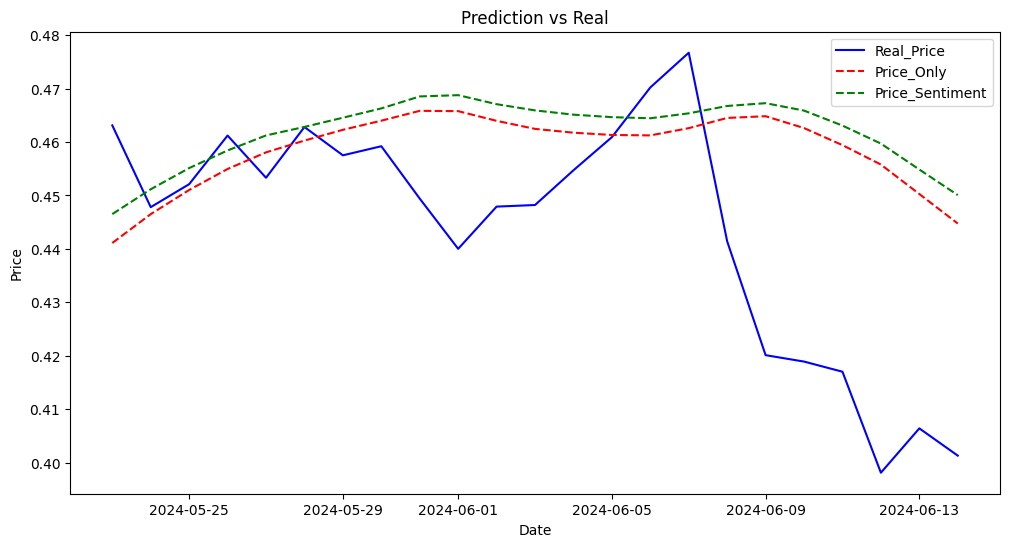

In [ ]:
# 预测
y_pred_sentiment = model_sentiment.predict(X_test)
y_pred_price = model_price.predict(X_test_price)

# 反向转换
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 1))), axis=1))[:, 0]
y_pred_sentiment_inv = scaler.inverse_transform(np.concatenate((y_pred_sentiment, np.zeros((len(y_pred_sentiment), 1))), axis=1))[:, 0]
y_pred_price_inv = scaler.inverse_transform(np.concatenate((y_pred_price, np.zeros((len(y_pred_price), 1))), axis=1))[:, 0]

# 计算均方误差
mse_sentiment = mean_squared_error(y_test_inv, y_pred_sentiment_inv)
mse_price = mean_squared_error(y_test_inv, y_pred_price_inv)

print(f'MSE (仅价格预测): {mse_price}')
print(f'MSE (价格+情感预测): {mse_sentiment}')

# 绘制预测结果
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_inv, color='blue', label='Real_Price')
plt.plot(data.index[-len(y_test):], y_pred_price_inv, color='red', linestyle='--', label='Price_Only')
plt.plot(data.index[-len(y_test):], y_pred_sentiment_inv, color='green', linestyle='--', label='Price_Sentiment')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prediction vs Real')
plt.legend()
plt.show()


1/1 [==============================] - 1s 527ms/step
MSE (仅价格预测): 0.0006827060576471745
MSE (价格+情感预测): 0.0007972057971092805


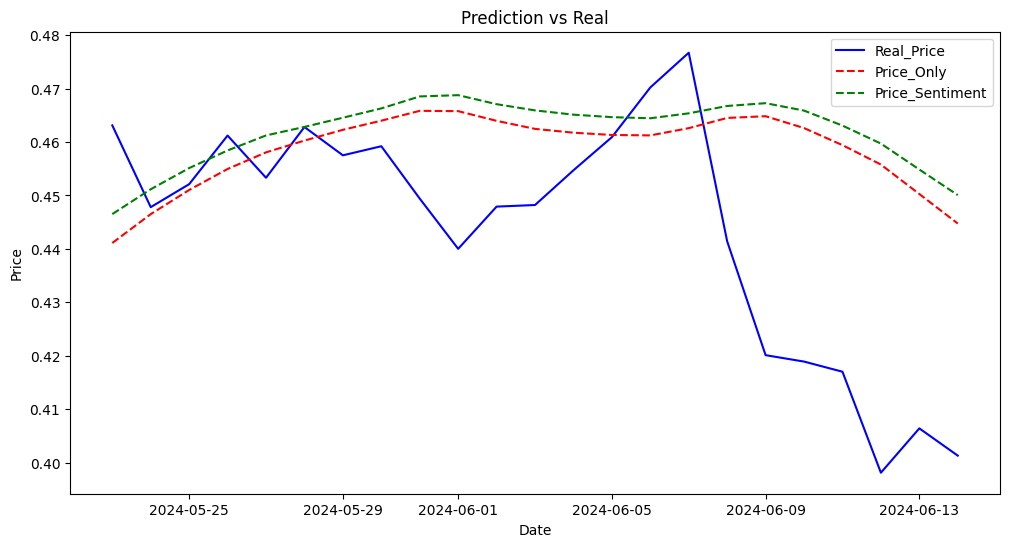

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)
tf.random.set_seed(42)

# 预测
y_pred_sentiment = model_sentiment.predict(X_test)
y_pred_price = model_price.predict(X_test_price)

# 反向转换
y_test_inv = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), np.zeros((len(y_test), 1))), axis=1))[:, 0]
y_pred_sentiment_inv = scaler.inverse_transform(np.concatenate((y_pred_sentiment, np.zeros((len(y_pred_sentiment), 1))), axis=1))[:, 0]
y_pred_price_inv = scaler.inverse_transform(np.concatenate((y_pred_price, np.zeros((len(y_pred_price), 1))), axis=1))[:, 0]

# 计算均方误差
mse_sentiment = mean_squared_error(y_test_inv, y_pred_sentiment_inv)
mse_price = mean_squared_error(y_test_inv, y_pred_price_inv)

print(f'MSE (仅价格预测): {mse_price}')
print(f'MSE (价格+情感预测): {mse_sentiment}')

# 绘制预测结果
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test_inv, color='blue', label='Real_Price')
plt.plot(data.index[-len(y_test):], y_pred_price_inv, color='red', linestyle='--', label='Price_Only')
plt.plot(data.index[-len(y_test):], y_pred_sentiment_inv, color='green', linestyle='--', label='Price_Sentiment')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Prediction vs Real')
plt.legend()
plt.show()
